<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Основная часть</a></span></li><li><span><a href="#Дополнительная-часть" data-toc-modified-id="Дополнительная-часть-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Дополнительная часть</a></span></li></ul></li></ul></li><li><span><a href="#Описания-полей" data-toc-modified-id="Описания-полей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описания полей</a></span></li><li><span><a href="#Задание-1.1-Seaborn" data-toc-modified-id="Задание-1.1-Seaborn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 1.1 Seaborn</a></span></li></ul></div>

# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [4]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [5]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [6]:
df.nunique()

age                       84
gender                     2
city_type                  5
full_mob                 185
ml_balance               575
cl_balance_0m           8177
loan_balance_0m        11077
td_balance_0m           1434
casa_balance_0m        36395
dc_trx_cnt              1204
dc_trx_sum             29266
income                 19630
min_casa_balance_1q    31824
max_casa_balance_1q    40854
avg_casa_balance_1Y    44790
min_td_balance_1q       1307
max_td_balance_1q       1532
avg_td_balance_1Y       2455
min_loan_balance_1q    10385
max_loan_balance_1q    11779
avg_loan_balance_1Y    13105
min_cl_balance_1q       7766
max_cl_balance_1q       8444
avg_cl_balance_1Y       9530
loan_to_deposit          346
Avg_trx                29748
avgtrx_to_balance      31399
nbi                    47242
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

# Задание 1.1 Seaborn

In [8]:
# Эта команда позволяет вывыводить результаты друг за другом без вызова print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

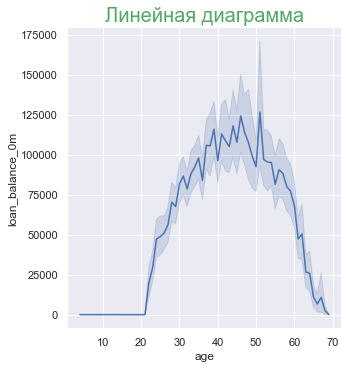

In [9]:
# Линейная диаграмма один к одному для сравниваемых показателей

sns.set(style='darkgrid')  

sns.relplot(
    x='age', 
    y='loan_balance_0m', 
    data=df.query("age < 70"), 
    kind='line'
)
plt.title('Линейная диаграмма', size=20, color='g');

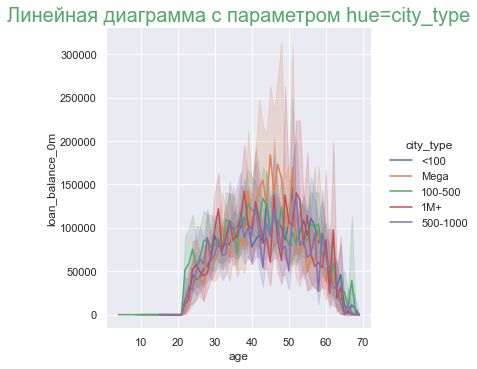

In [10]:
day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='age', 
    y='loan_balance_0m', 
    hue='city_type', 
    hue_order=day_order,
    data=df.query("age < 70"), kind='line')
plt.title('Линейная диаграмма с параметром hue=city_type', size=20, color='g');

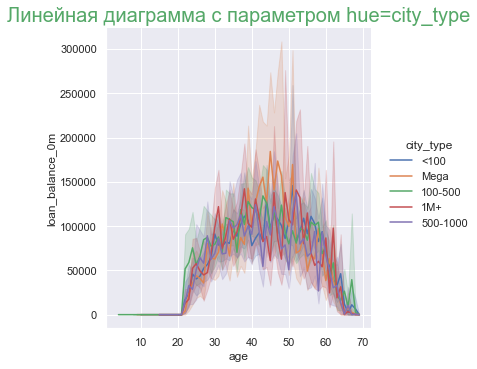

In [11]:
sns.relplot(x='age',
            y='loan_balance_0m',
            hue='city_type',
            hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
            data=df.query("age < 70"), kind='line')
plt.title('Линейная диаграмма c параметром hue=city_type', size=20, color='g');

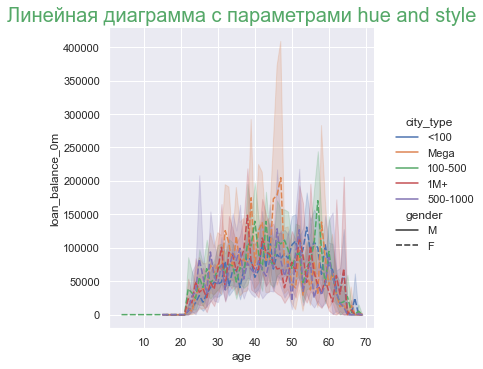

In [12]:
sns.relplot(
    x='age', 
    y='loan_balance_0m',
    hue='city_type', 
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'], 
    style='gender', 
    style_order=['M', 'F'], 
    kind='line', 
    data=df.query("age < 70"))
plt.title('Линейная диаграмма c параметрами hue and style', size=20, color='g')

plt.show();

In [13]:
a = df.ml_balance
c = []
for i in a:
    if i == 0.0:
        c.append('N')
    else:
        c.append('Y')
df["IpotekaY/N"] = c
df["IpotekaY/N"].unique()

array(['N', 'Y'], dtype=object)

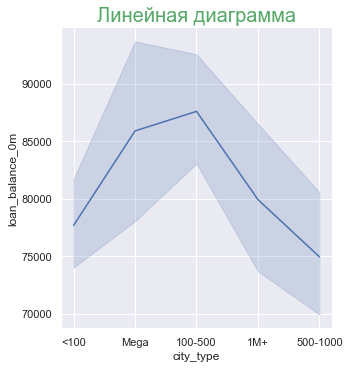

In [14]:
# Линейные диаграммы с отношением один ко многим

sns.relplot(
    x='city_type', 
    y='loan_balance_0m', 
    data=df, 
    kind='line')
plt.title('Линейная диаграмма', size=20, color='g');

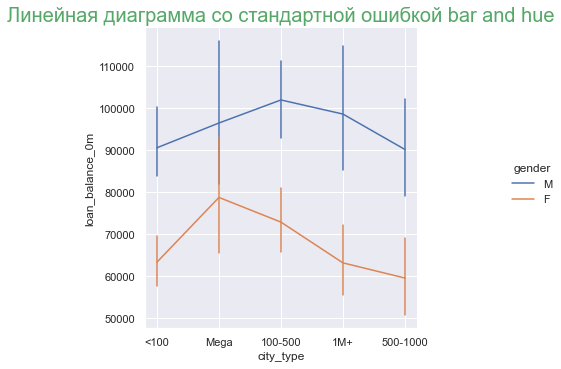

In [15]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m', 
    hue='gender', 
    data=df, 
    kind='line',
    err_style="bars", 
    ci=99)   # Standard Errors
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=20, color='g');

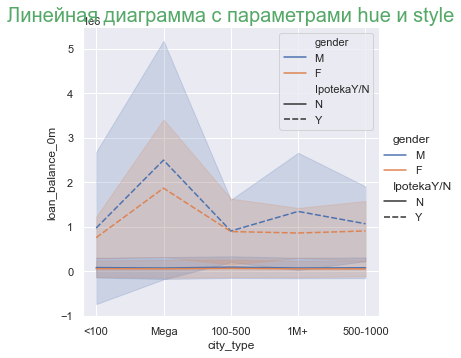

In [16]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m',
    hue='gender',
    style='IpotekaY/N', 
    kind='line', 
    ci='sd', 
    data=df)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');
plt.legend();

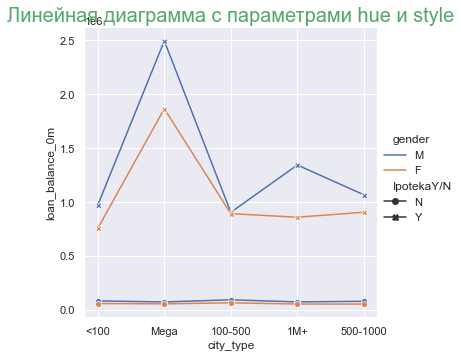

In [17]:
sns.relplot(
    x='city_type', 
    y='loan_balance_0m',
    hue='gender',
    style='IpotekaY/N',
    dashes=False, 
    markers=True,
    data=df, 
    kind='line', 
    ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

In [18]:
df_1 = df[['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m', 'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'avgtrx_to_balance', 'income', 'IpotekaY/N']]
df_1.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,avgtrx_to_balance,income,IpotekaY/N
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,NaN,0.0,N
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,NaN,0.0,N
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,0.083467,0.0,N
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,NaN,0.0,N
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,NaN,0.0,N


In [ ]:
age возраст
gender пол repexc_date
city_type Тип города проживания клиента
full_mob Длительность взаимоотношений с банком
ml_balance ипотека
cl_balance_0m потребительский кредит
loan_balance_0m все кредиты
td_balance_0m депозит
casa_balance_0m счета
avgtrx_to_balance
income доход клиента
IpotekaY/N

In [80]:
# Создание длинного датафрейма из датафрейма широкой формы

long_sales = pd.melt(df_1, var_name='Item', value_name='Sales',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 'avgtrx_to_balance', 'income', 'IpotekaY/N'])
long_sales.shape         
long_sales.head()

(250000, 9)

,age,gender,city_type,full_mob,avgtrx_to_balance,income,IpotekaY/N,Item,Sales
0,71,NaN,<100,103,NaN,0.0,N,ml_balance,0.0
1,49,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
2,56,NaN,Mega,81,0.083467,0.0,N,ml_balance,0.0
3,47,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
4,74,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0


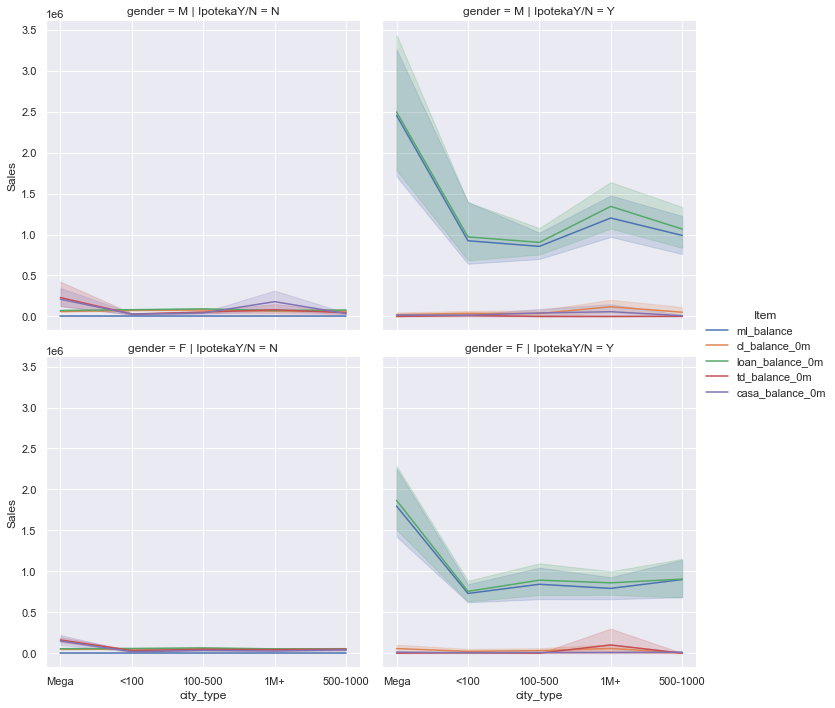

In [20]:
# Линейные диаграммы из датафрейма длинной формы

g = sns.relplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='line', 
    hue='Item', 
    row='gender', 
    col='IpotekaY/N')

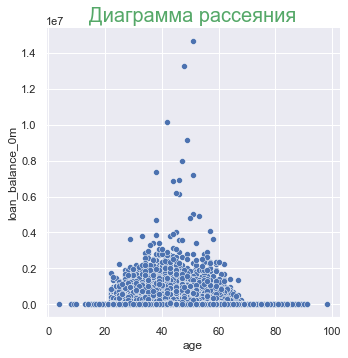

In [24]:
# Scatterplot()

sns.relplot(
    x='age',
    y='loan_balance_0m',
    data=df,
#     kind='scatter'
#     kind='line'
)
plt.title('Диаграмма рассеяния', size=20, color='g');

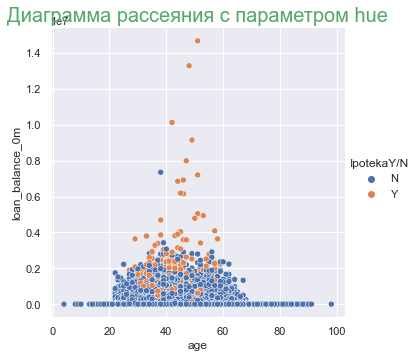

In [26]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N', 
    data=df)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

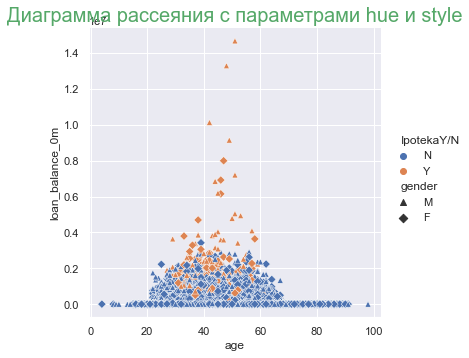

In [27]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N', 
    style='gender', 
    markers=['^', 'D'],
    data=df)
plt.title('Диаграмма рассеяния с параметрами hue и style', size=20, color='g');

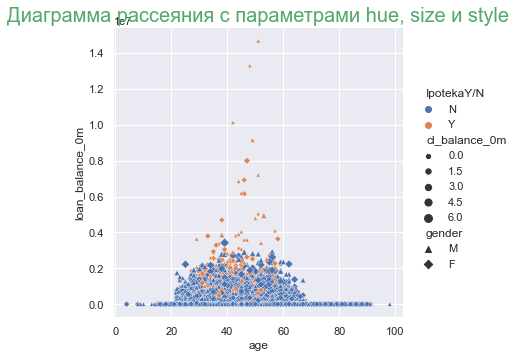

In [28]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N', 
    style='gender', 
    size='cl_balance_0m',
    markers=['^', 'D'],
    data=df
)

plt.title('Диаграмма рассеяния с параметрами hue, size и style', size=20, color='g');

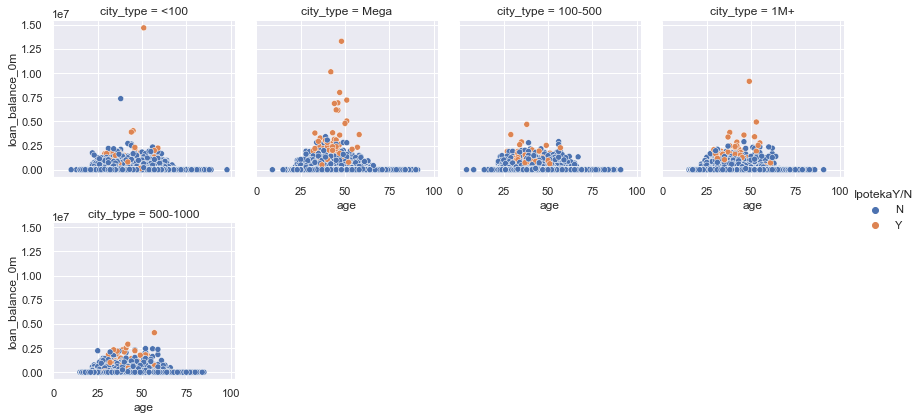

In [37]:
# Диаграмма рассеяния с параметром Hue и дополнительными переменными

day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='age',
    y='loan_balance_0m',
    hue='IpotekaY/N',
    col='city_type',
    col_wrap=4,
    col_order=day_order,
    data=df,
    height=3
);

In [ ]:
age возраст
gender пол repexc_date
city_type Тип города проживания клиента
full_mob Длительность взаимоотношений с банком
ml_balance ипотека
cl_balance_0m потребительский кредит
loan_balance_0m все кредиты
td_balance_0m депозит
casa_balance_0m счета
avgtrx_to_balance
income доход клиента
IpotekaY/N

In [36]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

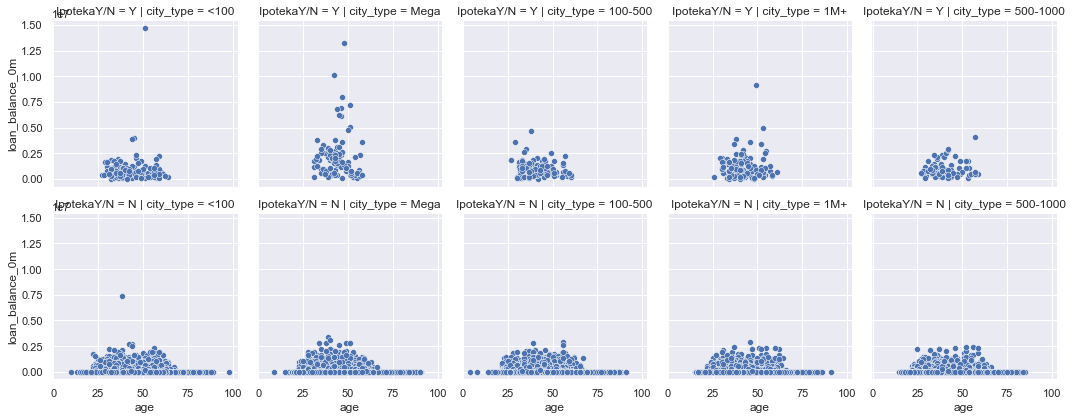

In [38]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    col='city_type',
    col_order=day_order,
    row='IpotekaY/N',
    row_order=['Y', 'N'],
    data=df,
    height=3);

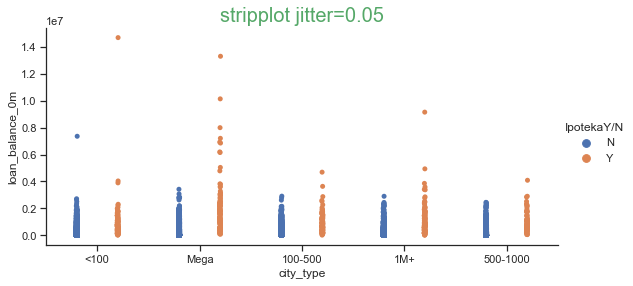

In [45]:
# Категорийные диаграммы, sns.catplot()

sns.set(style="ticks", color_codes=True)

day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type',
    y='loan_balance_0m', 
    data=df, 
    hue='IpotekaY/N',    # оба на одном графике разными цветами
    order=day_order, 
    jitter=0.01,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

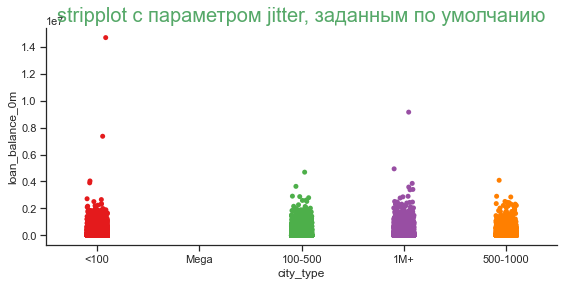

In [40]:
sns.catplot(
    x='city_type',
    y='loan_balance_0m', 
    data=df.query("city_type != 'Mega'"), 
    order=['<100', 'Mega', '100-500', '1M+', '500-1000'],
    palette='Set1', 
#     jitter=False, выстраивает все точки в линию
    height=4,
    aspect=2); 

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
F:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


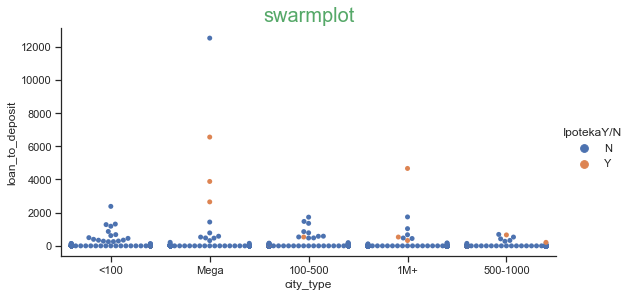

In [50]:
sns.catplot(
    x='city_type',
    y='loan_to_deposit',
    data=df, 
    order=day_order, 
    hue='IpotekaY/N',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

In [121]:
long_sales = pd.melt(df_1, var_name='Item', value_name='Sales',
            id_vars=['age', 'gender', 'city_type', 'full_mob', 'avgtrx_to_balance', 'income', 'IpotekaY/N'])
long_sales.shape         
long_sales.head()

(250000, 9)

,age,gender,city_type,full_mob,avgtrx_to_balance,income,IpotekaY/N,Item,Sales
0,71,NaN,<100,103,NaN,0.0,N,ml_balance,0.0
1,49,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
2,56,NaN,Mega,81,0.083467,0.0,N,ml_balance,0.0
3,47,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0
4,74,NaN,Mega,81,NaN,0.0,N,ml_balance,0.0


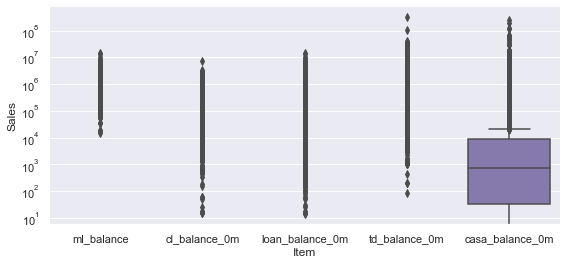

In [122]:
# boxplot(), kind='box'
# boxnplot(), kind='boxn'

sns.set(style='darkgrid')
day_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    height=4, 
    aspect=2
);
plt.yscale(value='log')

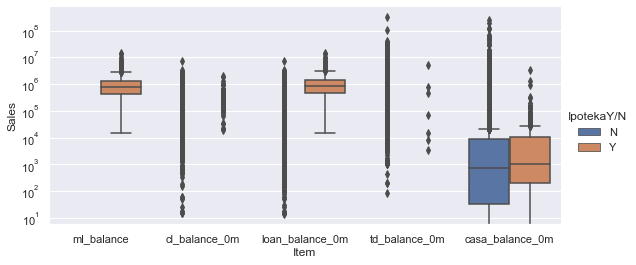

In [123]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='IpotekaY/N',
    height=4, 
    aspect=2);
plt.yscale(value='log')

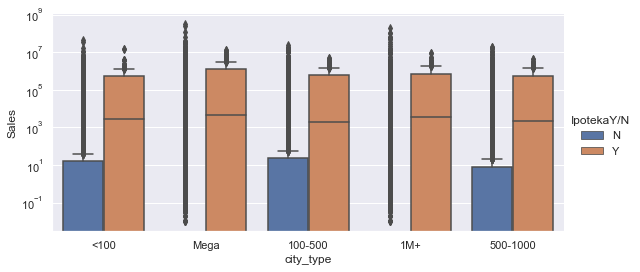

In [125]:
sns.catplot(
    x='city_type', 
    y='Sales', 
    data=long_sales, 
    kind='box', 
    hue='IpotekaY/N', 
    order=day_order, 
    height=4, 
    aspect=2); 
plt.yscale(value='log')

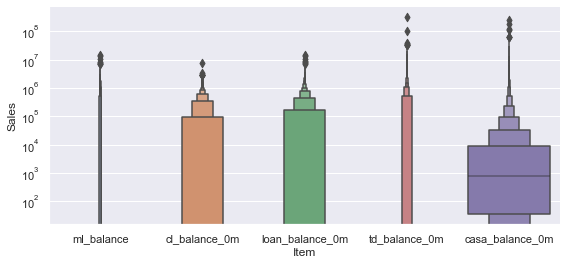

In [126]:
sns.catplot(
    x='Item', 
    y='Sales', 
    data=long_sales, 
    kind='boxen', 
    height=4, 
    aspect=2); 
plt.yscale(value='log')

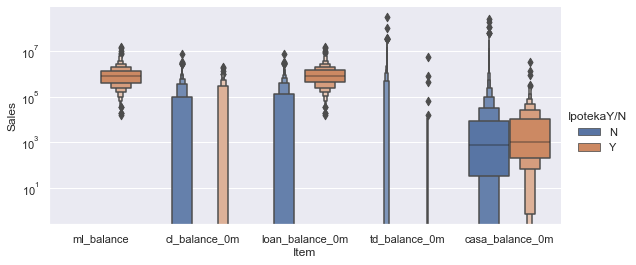

In [127]:
sns.catplot(
    x='Item',
    y='Sales',
    data=long_sales,
    kind='boxen',
    hue='IpotekaY/N',
    height=4, 
    aspect=2);
plt.yscale(value='log')

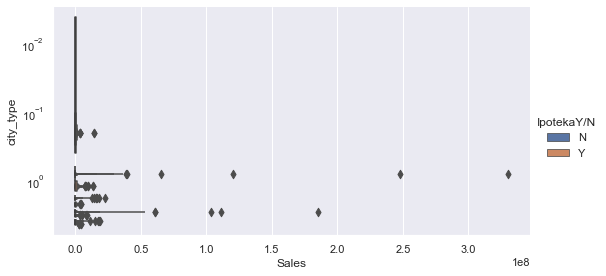

In [133]:
sns.catplot(
    x='Sales', 
    y='city_type', 
    data=long_sales, 
    kind='boxen', 
    hue='IpotekaY/N',
    order=day_order, 
    height=4, 
    aspect=2);
plt.yscale(value='log')